# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries
import pandas as pd
import numpy as np

# Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 

# metrics, plot_confusion_matrix and classfication_report
from sklearn import metrics 

# data split
from sklearn.model_selection import train_test_split

# plotting 
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()


0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df['label'].value_counts()

Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 

df.head()
pixel_cols = df.columns

# Convert the all columns object into a regular list
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols))

# Remove the label column from the list

pixel_cols.remove('label')

pixel_cols

<class 'list'>


['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

<class 'numpy.ndarray'>


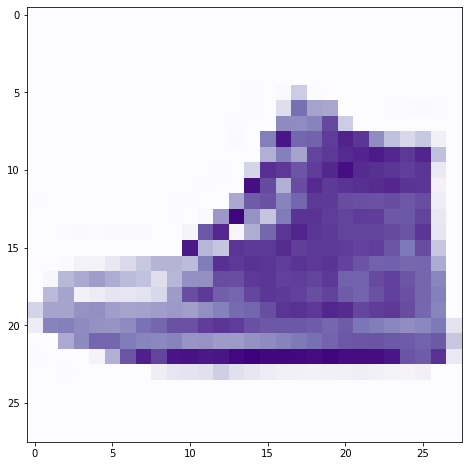

In [7]:
# Select just the pixel columns and convert them to a numpy array by using .0values. 

plt.figure(figsize=(8, 8))
imgs = df[pixel_cols].values
print(type(imgs))

# Select just one image from all the images
img = imgs[111]


# Reshape the image to be a 28x28 matrix (original format of image)

img = img.reshape(28, 28)

# Plot reshaped image
plt.imshow(img, cmap = 'Purples')

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [8]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)
# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
selected_features.remove('label')
# This happnes 'in place'

selected_features

<class 'list'>


['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

### 2. Define our `X` and `y`

In [9]:
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']

# size of the dataframe 
print(df.shape)
df.label.value_counts()

(6000, 785)


Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

### 3. Train-test-split our `X` and `y` data

In [10]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)


____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [11]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [12]:
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [13]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.838000


### 2. Make new predictions using our test data. 

In [14]:
### 2. Make new predictions using our test data. 

y_pred = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [15]:
### 3. Print the classification report. 

print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Ankle boot       0.88      0.93      0.90       141
         Bag       0.91      0.97      0.94       141
        Coat       0.73      0.82      0.77       139
       Dress       0.83      0.89      0.86       151
    Pullover       0.77      0.73      0.75       148
      Sandal       0.90      0.91      0.90       159
       Shirt       0.71      0.48      0.58       159
     Sneaker       0.86      0.83      0.85       161
 T-shirt/top       0.76      0.91      0.83       139
     Trouser       0.99      0.94      0.97       162

    accuracy                           0.84      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.84      0.84      0.83      1500



### 4. Plot the confusion matrix of our predicted results. 

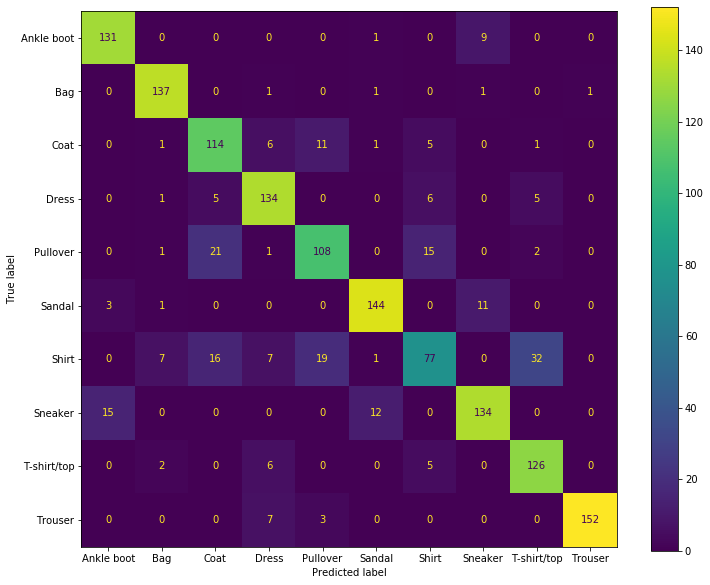

In [16]:
### 4. Plot the confusion matrix of our predicted results.

fig, ax =plt.subplots(figsize=(12, 10))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)


### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [36]:
print('The classifier mistakedthe most:')
print("Shirt -> Pullover, shirt -> T-shirt/top")

The classifier mistakedthe most:
Shirt -> Pullover, shirt -> T-shirt/top


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [30]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    
    print('Running report for model', model)
    
    # split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # fit model
    model.fit(X_train, y_train)
    
    # accuracy
    accuracy = model.score(X_test, y_test)
    print("Accuracy: ",accuracy)
    
    # prediction
    y_pred = model.predict(X_test)
    
    # Classification report
    print(metrics.classification_report(y_test, y_pred))
    
    # Confusion matrix
    fig, ax = (plt.subplots(figsize=(10,10)))
    
    metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)
    
    return model



## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

Running report for model LogisticRegression()
Accuracy:  0.7873333333333333
              precision    recall  f1-score   support

  Ankle boot       0.88      0.94      0.91       142
         Bag       0.91      0.92      0.92       143
        Coat       0.57      0.66      0.62       134
       Dress       0.80      0.78      0.79       145
    Pullover       0.65      0.59      0.62       162
      Sandal       0.92      0.85      0.89       164
       Shirt       0.53      0.51      0.52       152
     Sneaker       0.88      0.89      0.88       168
 T-shirt/top       0.73      0.74      0.74       147
     Trouser       0.99      0.99      0.99       143

    accuracy                           0.79      1500
   macro avg       0.79      0.79      0.79      1500
weighted avg       0.79      0.79      0.79      1500



C:\Users\16464\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

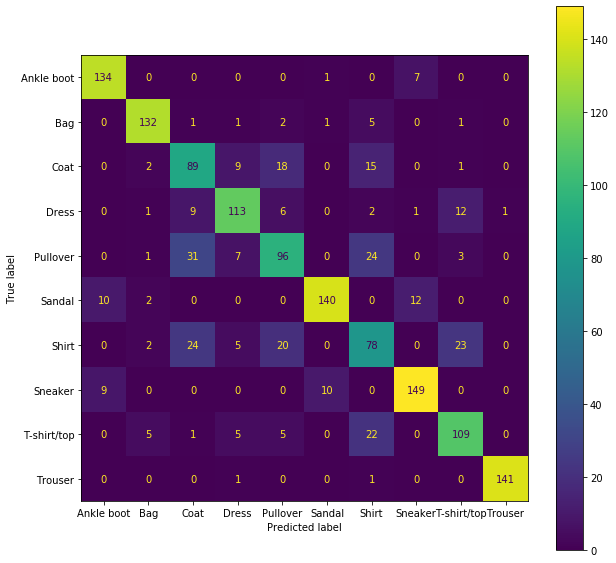

In [31]:
# LogisticRegression

lr = LogisticRegression()
build_and_eval_model(lr,X,y)

Running report for model RandomForestClassifier()
Accuracy:  0.8313333333333334
              precision    recall  f1-score   support

  Ankle boot       0.90      0.94      0.92       142
         Bag       0.92      0.99      0.96       143
        Coat       0.67      0.71      0.69       134
       Dress       0.79      0.87      0.83       145
    Pullover       0.71      0.78      0.74       162
      Sandal       0.92      0.95      0.93       164
       Shirt       0.71      0.49      0.58       152
     Sneaker       0.92      0.85      0.88       168
 T-shirt/top       0.76      0.76      0.76       147
     Trouser       1.00      0.99      0.99       143

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



RandomForestClassifier()

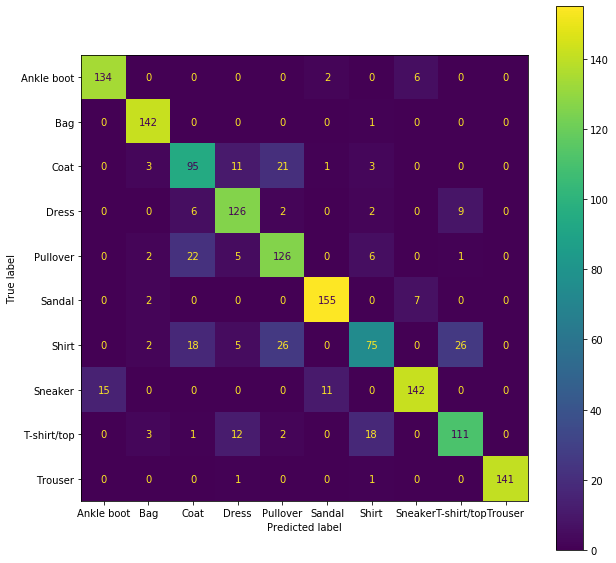

In [33]:
# RandomForest
rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)

Running report for model LinearSVC()
Accuracy:  0.7466666666666667
              precision    recall  f1-score   support

  Ankle boot       0.89      0.92      0.90       142
         Bag       0.86      0.87      0.87       143
        Coat       0.53      0.66      0.58       134
       Dress       0.72      0.73      0.73       145
    Pullover       0.58      0.66      0.62       162
      Sandal       0.88      0.74      0.81       164
       Shirt       0.54      0.29      0.38       152
     Sneaker       0.83      0.88      0.85       168
 T-shirt/top       0.70      0.77      0.73       147
     Trouser       0.92      0.97      0.94       143

    accuracy                           0.75      1500
   macro avg       0.74      0.75      0.74      1500
weighted avg       0.74      0.75      0.74      1500



C:\Users\16464\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

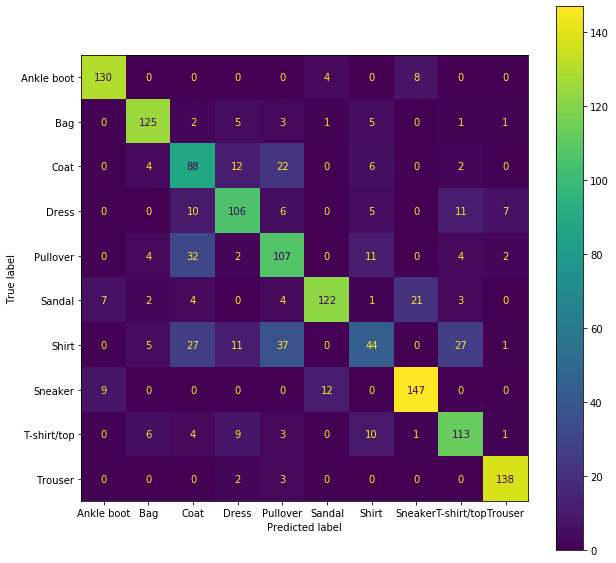

In [35]:
# MultinomialNB
lsvc = svm.LinearSVC()
build_and_eval_model(lsvc, X, y)

In [37]:
print('RandomForest model did the best and lsvc model did the worst.')

RandomForest model did the best and lsvc model did the worst.
